<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(19, 186, 216); padding: 20px; background-color: rgba(0, 0, 0, 0.5); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color:rgb(19, 186, 216); text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5); font-weight: bold; margin-bottom: 10px;">📊GeoStat: Country-Level Universities Rankings Data | 2023</div>

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);"></span>About Dataset📁</p>

<div style="border-radius:10px; border:rgb(19, 186, 216) solid ; padding: 15px; background-color:rgb(0, 0, 0); font-size:100%; text-align:left">
<h4>Discover the Global University Rankings Dataset 2023 7 columns:</h4>
comprehensive and insightful compilation of the world's top universities. Uncover the rankings, metrics, and key performance indicators of renowned academic institutions worldwide. Whether you're a researcher, student, or educator, this dataset provides valuable insights to understand trends and make informed decisions. Explore academic excellence and innovation across diverse disciplines, empowering data-driven analysis and fostering a deeper understanding of the global higher education landscape. Elevate your research and gain a broader perspective with this authoritative resource on university rankings

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">1 </span>| Import Necessary Libraries</p>

In [1]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 41.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.1
    Uninstalling scipy-1.11.1:
      Successfully uninstalled scipy-1.11.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.10.1 which is incompatible.


In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo 
import plotly.figure_factory as ff
from wordcloud import WordCloud
color_pal = sns.color_palette()
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

import nltk

import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='colorblind')
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
/tmp/ipykernel_20/1745313295.py:14: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">2 </span>| 📊EDA</p>

In [3]:
df=pd.read_csv('world_university_rank.csv')


In [4]:
df.head()

Rank                        University name locationLocation  \
0    1                   University of Oxford   United Kingdom   
1    2                     Harvard University    United States   
2    3                University of Cambridge   United Kingdom   
3    3                    Stanford University    United States   
4    5  Massachusetts Institute of Technology    United States   

  Number of Studnet  Number of student per staffs International Student  \
0            20,965                          10.6                   42%   
1            21,887                           9.6                   25%   
2            20,185                          11.3                   39%   
3            16,164                           7.1                   24%   
4            11,415                           8.2                   33%   

  Female : male ratio  
0             48 : 52  
1             50 : 50  
2             47 : 53  
3             46 : 54  
4             40 : 60

In [5]:
df.shape

(2345, 7)

In [6]:
cols  = df.columns
cols

Index(['Rank', 'University name', 'locationLocation', 'Number of Studnet',
       'Number of student per staffs', 'International Student',
       'Female : male ratio'],
      dtype='object')

In [7]:
df.dtypes

Rank                             object
University name                  object
locationLocation                 object
Number of Studnet                object
Number of student per staffs    float64
International Student            object
Female : male ratio              object
dtype: object

In [8]:
df.describe().T

count       mean       std  min   25%   50%  \
Number of student per staffs  2344.0  18.722056  11.92133  0.4  12.3  16.3   

                               75%    max  
Number of student per staffs  21.9  232.2

In [9]:
df.describe(include = 'object').T

count unique                   top freq
Rank                   2345    161              Reporter  546
University name        2345   2345  University of Oxford    1
locationLocation       2234    117         United States  179
Number of Studnet      2345   2260                10,814    3
International Student  2345     79                    0%  336
Female : male ratio    2255     87               58 : 42  101

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rank                          2345 non-null   object 
 1   University name               2345 non-null   object 
 2   locationLocation              2234 non-null   object 
 3   Number of Studnet             2345 non-null   object 
 4   Number of student per staffs  2344 non-null   float64
 5   International Student         2345 non-null   object 
 6   Female : male ratio           2255 non-null   object 
dtypes: float64(1), object(6)
memory usage: 128.4+ KB


In [11]:
unique_values = df.nunique()
unique_values

Rank                             161
University name                 2345
locationLocation                 117
Number of Studnet               2260
Number of student per staffs     424
International Student             79
Female : male ratio               87
dtype: int64

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">3 </span>| Null values</p>

In [12]:
df.isna().sum()

Rank                              0
University name                   0
locationLocation                111
Number of Studnet                 0
Number of student per staffs      1
International Student             0
Female : male ratio              90
dtype: int64

<Axes: >

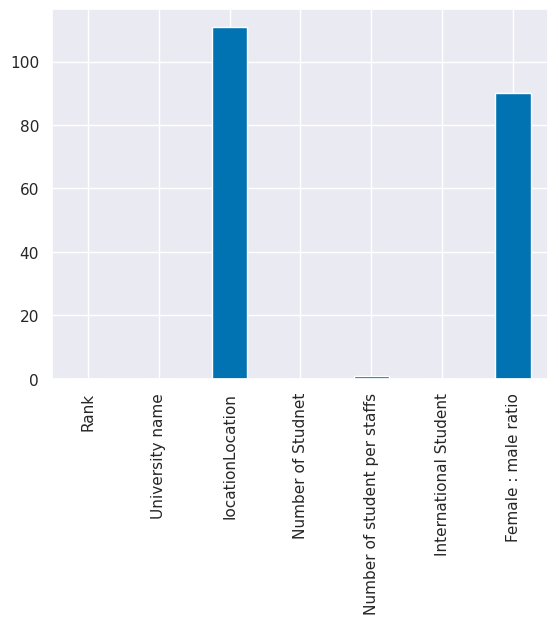

In [13]:
df.isna().sum().plot(kind ='bar')

In [14]:
# Fill missing values in the 'locationLocation' column with 'Unknown'
df['locationLocation'].fillna('Unknown', inplace=True)

df.dropna(axis=0,inplace=True)

print(df.shape)

(2255, 7)


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">4 </span>| Duplicate rows</p>


In [15]:
# Finding duplicate rows
duplicate_rows = df[df.duplicated(keep='first')]

# Number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Displaying the duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")
duplicate_rows

Number of duplicate rows: 0


Empty DataFrame
Columns: [Rank, University name, locationLocation, Number of Studnet, Number of student per staffs, International Student, Female : male ratio]
Index: []

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">5 </span>| Feature engineering</p>

In [16]:
#df['Number of Studnet'] = pd.to_numeric(df['Number of Studnet'], errors='coerce')
df['Number of Studnet'] = df['Number of Studnet'].str.replace(',', '').astype(int) 

In [17]:
#df['International Student'] = df['International Student'].str.replace('%', '', regex=True).astype(int) 
df['International Student'] = df['International Student'].str.replace('%', ' ')
df['International Student'] = pd.to_numeric(df['International Student'], errors='coerce')

In [18]:
df['International Student']=  df['International Student']/100

In [19]:
df.columns = df.columns.str.strip()

# Split the 'Female : Male Ratio' column and create new 'Female' and 'Male' columns
df[['Female', 'Male']] = df['Female : male ratio'].str.split(':', expand=True).astype(int)

# Drop the original 'Female : Male Ratio' column
df.drop(columns=['Female : male ratio'], inplace=True)

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">6 </span>| Data visualisation</p>

In [20]:
# Import the ProfileReport class from the ydata_profiling library
from ydata_profiling import ProfileReport

# Create a comprehensive profile report for the DataFrame 'df'
# This report will contain various statistics, insights, and visualizations about the data
profile = ProfileReport(df)

In [21]:
profile                     # or this one
profile.to_notebook_iframe() # use this line to show the output

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
# Calculate the sum of salaries for each job title
monthly_trends = df.groupby('International Student')['Number of Studnet'].sum().reset_index()

# Create a line plot using Plotly Express
# x-axis: International Student, y-axis: Number of Studnet,
# labels for the x-axis, title, and customized height
fig_monthly_trends = px.line(
    monthly_trends,  # DataFrame containing the data
    x='International Student',   # x-values: International Student
    y='Number of Studnet',  # y-values :Number of Studnet
    labels={'International Student': 'International Student'},  # Customize label for the x-axis
    title='Number of Studnet by International Student',  # Set the title of the plot
    height=800  # Set the height of the plot
)

# Display the plot
fig_monthly_trends.show()

In [23]:
locationLocation_of_Studnet = df.groupby('locationLocation')['Number of Studnet'].sum().reset_index()

# Create a line plot using Plotly Express
# x-axis: locationLocation, y-axis: Number of Studnet ,
# labels for the x-axis, title, and customized height
locationLocation_of_Studnet = px.line(
    locationLocation_of_Studnet,  # DataFrame containing the data
    x='locationLocation',   # x-values
    y='Number of Studnet',  # y-values
    labels={'job_title': 'Job'},  # Customize label for the x-axis
    title='Number of Studnet  by location',  # Set the title of the plot
    height=800  # Set the height of the plot
)

# Display the plot
locationLocation_of_Studnet.show()

In [24]:
Number_of_Female_Studnet = df.groupby('Female')['Number of Studnet'].sum().reset_index()

# Create a line plot using Plotly Express
# x-axis: locationLocation, y-axis: Number of Studnet ,
# labels for the x-axis, title, and customized height
Number_of_Female_Studnet = px.line(
    Number_of_Female_Studnet,  # DataFrame containing the data
    x='Female',   # x-values
    y='Number of Studnet',  # y-values
    labels={'Female': 'Female'},  # Customize label for the x-axis
    title='Number of Studnet  by Female Number',  # Set the title of the plot
    height=800  # Set the height of the plot
)

# Display the plot
Number_of_Female_Studnet.show()

In [25]:
Number_of_Female_Studnet = df.groupby(['Female','Male'])['Number of Studnet'].sum().reset_index()

# Create a line plot using Plotly Express
# x-axis: locationLocation, y-axis: Number of Studnet ,
# labels for the x-axis, title, and customized height
Number_of_Female_Studnet = px.line(
    Number_of_Female_Studnet,  # DataFrame containing the data
    x='Female',   # x-values
    y='Number of Studnet',  # y-values
    labels={'Female': 'Female , Male '},  # Customize label for the x-axis
    title='Number of Studnet  by Female , Male Number',  # Set the title of the plot
    height=800  # Set the height of the plot
)

# Display the plot
Number_of_Female_Studnet.show()

In [26]:
# Calculate the value counts for each unique value in the 'job_title' column
top10_job_title = df['locationLocation'].value_counts()[:10]

# Create a bar plot using Plotly Express
# y-axis: Count of each job title, x-axis: Job titles,
# color-coded by job titles and using a color palette
fig = px.bar(
    y=top10_job_title.values,  # y-values: count of each job title
    x=top10_job_title.index,   # x-values: job titles
    color=top10_job_title.index,  # Color the bars based on job titles
    color_discrete_sequence=px.colors.sequential.PuBuGn,  # Set color palette
    text=top10_job_title.values,  # Display the count values on top of the bars
    title='Top 10 locationL ',  # Set the title of the plot
    template='plotly_dark'  # Use a dark template for the plot
)

# Update the layout of the plot
fig.update_layout(
    title_text='location Distribution',  # Set the title of the plot
    height=650,  # Set the height of the plot
    xaxis_title="location",  # Label for the x-axis
    yaxis_title="Count",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot
fig.show()

In [27]:
# Calculate the value counts for each unique value in the 'job_title' column
top10_Number_of_Studnet = df['Number of Studnet'].value_counts()[:10]

# Create a bar plot using Plotly Express
# y-axis: Count of each Number of Studnet , x-axis: Number of Studnet,
# color-coded by Number of Studnet and using a color palette
fig = px.bar(
    y=top10_Number_of_Studnet.values,  # y-values: count of each Number of Studnet
    x=top10_Number_of_Studnet.index,   # x-values: Number of Studnet
    color=top10_Number_of_Studnet.index,  # Color the bars based on job titles
    color_discrete_sequence=px.colors.sequential.PuBuGn,  # Set color palette
    text=top10_Number_of_Studnet.values,  # Display the count values on top of the bars
    title='Top 10 Number of Studnet ',  # Set the title of the plot
    template='plotly_dark'  # Use a dark template for the plot
)

# Update the layout of the plot
fig.update_layout(
    title_text='Number of Studnet Distribution',  # Set the title of the plot
    height=700,  # Set the height of the plot
    xaxis_title="Number of Studnet",  # Label for the x-axis
    yaxis_title="Count",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot
fig.show()

In [28]:
# Select the top 5 salaries in the DataFrame
top5_Number_of_Studnet = df['Number of Studnet'].sort_values(ascending=False).head(5)

# Create a bar plot using Plotly Express
# y-axis: S=Number of Studnet, x-axis: Index of the top 5 Number of Studnet,
# color-coded by the index, and using a color palette
fig = px.bar(
    y=top5_Number_of_Studnet.values,  # y-values: top 5 Number of Studnet
    x=top5_Number_of_Studnet.index,   # x-values: indices of the top 5 Number of Studnet
    color=top5_Number_of_Studnet.index,  # Color the bars based on the indices
    color_discrete_sequence=px.colors.sequential.PuBuGn,  # Set color palette
    text=top5_Number_of_Studnet.values,  # Display the salary values on top of the bars
    title='Top 5 Number of Studnet',  # Set the title of the plot
    template='plotly_dark'  # Use a dark template for the plot
)

# Update the layout of the plot
fig.update_layout(
    title_text='Number of Studnet Distribution',  # Set the title of the plot
    height=650,  # Set the height of the plot
    xaxis_title="Number of Studnet",  # Label for the x-axis
    yaxis_title="Count",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot
fig.show()

In [29]:
# x-axis: "locationLocation", y-axis: "Number of student per staffs", color-coded by "Number of Studnet"
fig = px.bar(df, x="locationLocation", y="Number of student per staffs", color="Number of Studnet")

# Update the layout of the plot
fig.update_layout(
    title_text='locationLocation Distribution with Number of student per staffs ',  # Set the title of the plot
    height=650,  # Set the height of the plot
    xaxis_title="locationLocation",  # Label for the x-axis
    yaxis_title="Number of student per staffs",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot
fig.show()

In [30]:
# x-axis: "locationLocation", y-axis: "International Student", color-coded by "Number of Studnet"
fig = px.bar(df, x="locationLocation", y="International Student", color="Number of Studnet")

# Update the layout of the plot
fig.update_layout(
    title_text='locationLocation Distribution with  International Student',  # Set the title of the plot
    height=650,  # Set the height of the plot
    xaxis_title="locationLocation",  # Label for the x-axis
    yaxis_title="International Student",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot
fig.show()

In [31]:
# x-axis: "locationLocation", y-axis: "Number of Studnet", color-coded by "Female"
fig = px.bar(df, x="Female", y="Number of Studnet", color="Female")

# Update the layout of the plot
fig.update_layout(
    title_text='Number of Studnet Distribution with  Female Student',  # Set the title of the plot
    height=650,  # Set the height of the plot
    xaxis_title="Female",  # Label for the x-axis
    yaxis_title="Number of Studnet",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot
fig.show()

In [32]:
# x-axis: "Male", y-axis: "Number of Studnet", color-coded by "Male"
fig = px.bar(df, x="Male", y="Number of Studnet", color="Male")

# Update the layout of the plot
fig.update_layout(
    title_text='Number of Studnet Distribution with  Male Student',  # Set the title of the plot
    height=650,  # Set the height of the plot
    xaxis_title="Male",  # Label for the x-axis
    yaxis_title="Number of Studnet",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot
fig.show()

In [33]:
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=1200, 
               height=600, 
               max_words=50,
               colormap= colormap,
               max_font_size = 100,
               random_state=88, 
               background_color=color_background).generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()


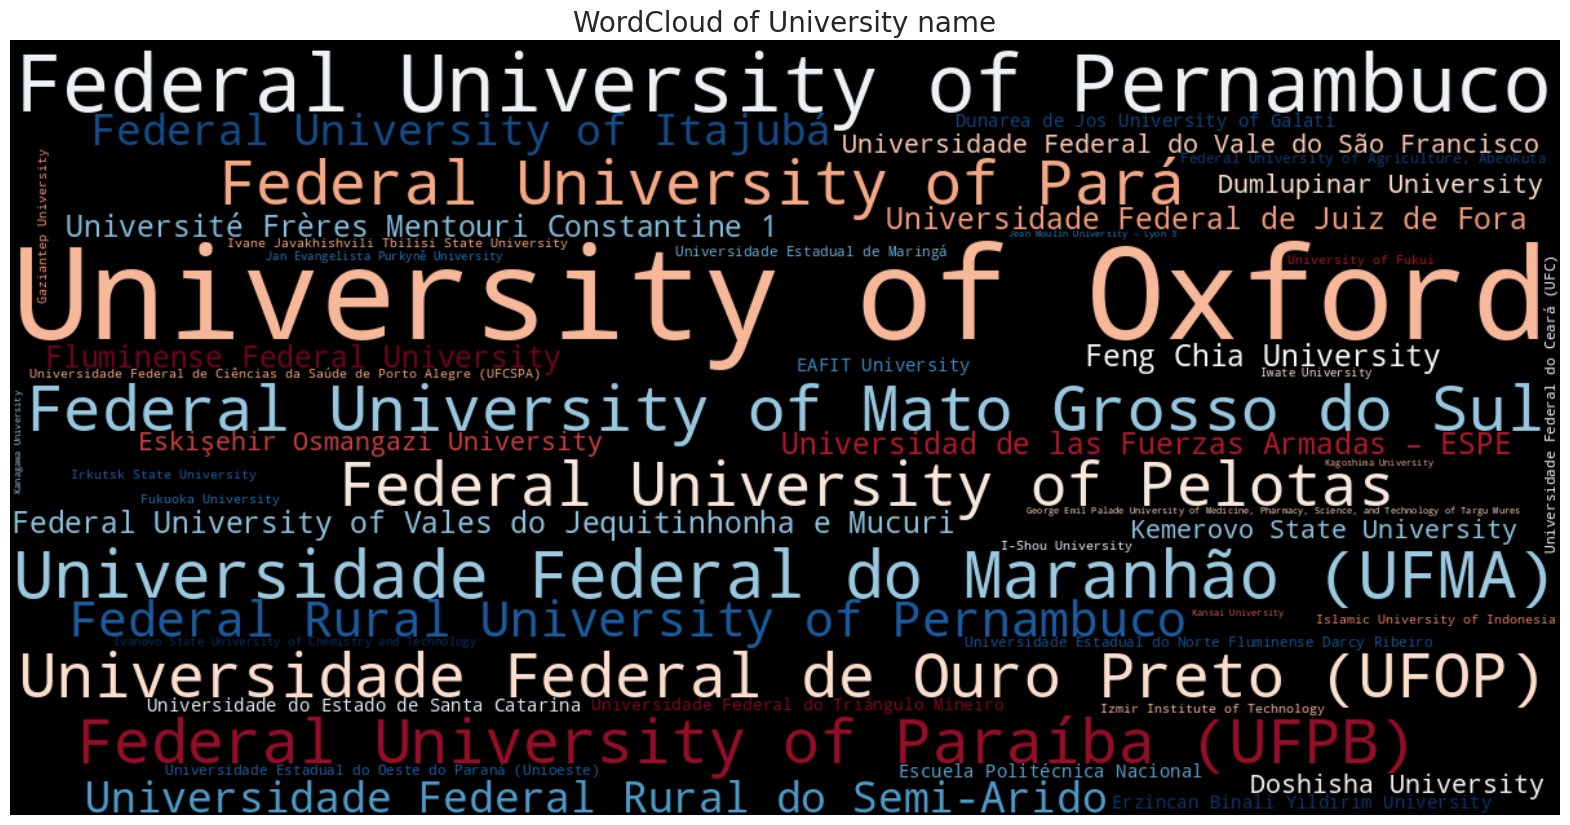

In [34]:
freq_df = Freq_df(df['University name'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'black','RdBu', 'WordCloud of University name')

In [35]:
# Box Plot
# Prepare data for the box plot
hist_data = [df['Number of Studnet']]
group_labels = ['Number of Studnet']

# Create the box plot using Plotly Express
fig1 = px.box(y=df['Number of Studnet'], template='plotly_dark', title='Number of Studnet (BoxPlot)')

# Customize the layout of the box plot
fig1.update_layout(font=dict(size=17, family="Franklin Gothic"))

# Display the box plot
fig1.show()

# Dist Plot
# Prepare data for the distribution plot
hist_data = [df['Number of Studnet']]
group_labels = ['Number of Studnet']

# Create the distribution plot using Plotly Figure Factory
fig2 = ff.create_distplot(hist_data, group_labels, show_hist=False)
fig2.layout.template = 'plotly_dark'

# Customize the layout of the distribution plot
fig2.update_layout(title='Number of Studnet (DistPlot)', font=dict(size=17, family="Franklin Gothic"))

# Display the distribution plot
fig2.show()


In [36]:
# Identify outliers in 'Number of Studnet' column using the IQR method on scaled data
Q1 = df['Number of Studnet'].quantile(0.25)
Q3 = df['Number of Studnet'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Number of Studnet'] < lower_bound) | (df['Number of Studnet'] > upper_bound)]

print("Number of outliers:", len(outliers))

# Remove outliers from the DataFrame
df = df[(df['Number of Studnet'] >= lower_bound) & (df['Number of Studnet'] <= upper_bound)]

Number of outliers: 85


In [37]:
# Remove rows with NaN values in the 'International Student' column
df_cleaned = df.dropna(subset=['International Student'])

# Box Plot
fig1 = px.box(df_cleaned, y='International Student', template='plotly_dark', title='International Student (BoxPlot)')
fig1.update_layout(font=dict(size=17, family="Franklin Gothic"))
fig1.show()

# Dist Plot
hist_data = [df_cleaned['International Student']]
group_labels = ['International Student']
fig2 = ff.create_distplot(hist_data, group_labels, show_hist=False)
fig2.layout.template = 'plotly_dark'
fig2.update_layout(title='International Student (DistPlot)', font=dict(size=17, family="Franklin Gothic"))
fig2.show()


In [38]:
# Remove rows with NaN values in the 'Number of student per staffs' column
# Box Plot
fig1 = px.box(df_cleaned, y='Number of student per staffs', template='plotly_dark', title='Number of student per staffs (BoxPlot)')
fig1.update_layout(font=dict(size=17, family="Franklin Gothic"))
fig1.show()

# Dist Plot
hist_data = [df_cleaned['Number of student per staffs']]
group_labels = ['Number of student per staffs']
fig2 = ff.create_distplot(hist_data, group_labels, show_hist=False)
fig2.layout.template = 'plotly_dark'
fig2.update_layout(title='Number of student per staffs (DistPlot)', font=dict(size=17, family="Franklin Gothic"))
fig2.show()


In [39]:
# Identify outliers in 'Number of student per staffs' column using the IQR method on scaled data
Q1 = df['Number of student per staffs'].quantile(0.25)
Q3 = df['Number of student per staffs'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Number of student per staffs'] < lower_bound) | (df['Number of student per staffs'] > upper_bound)]

print("Number of outliers:", len(outliers))

# Remove outliers from the DataFrame
df = df[(df['Number of student per staffs'] >= lower_bound) & (df['Number of student per staffs'] <= upper_bound)]

Number of outliers: 111


In [40]:
# Calculate the locationLocation_International_Student for each job title and sort in descending order
locationLocation_International_Student = df.groupby('locationLocation')['International Student'].mean().reset_index()
locationLocation_International_Student = locationLocation_International_Student.sort_values(by='International Student', ascending=False)

# Select the top 10 job titles with the highest average salary
top_10_locationLocation_International_Student = locationLocation_International_Student.head(10)

# Create a new figure using Plotly
fig = go.Figure()

# Add a bar trace to the figure
fig.add_trace(go.Bar(
    x=top_10_locationLocation_International_Student['locationLocation'],  # x-values: locationLocation
    y=top_10_locationLocation_International_Student['International Student']  # y-values: International Student
))

# Update the layout and appearance of the plot
fig.update_layout(
    title='Top 10 International Student by location',  # Set the title of the plot
    xaxis_title='location',  # Label for the x-axis
    yaxis_title='International Student',  # Label for the y-axis
    paper_bgcolor='#595964',  # Background color of the plot
    template='plotly_dark',  # Use a dark template for the plot
    font=dict(color='white'),  # Set font color to white
    height=650  # Set the height of the plot
)

# Initialize Plotly for notebook integration
pyo.init_notebook_mode(connected=True)

# Display the plot
pyo.iplot(fig)


In [41]:
v = px.funnel(df[:20], x="International Student", y="locationLocation")
v.show()

In [42]:
# x-axis: "University name", y-axis: "Number of Studnet", color-coded by "experience_level"
fig = px.scatter(df, x="University name", y="Number of Studnet", color="Number of Studnet")

# Update the layout of the plot
fig.update_layout(
    title_text='Number of Studnet Distribution',  # Set the title of the plot
    height=1000,  # Set the height of the plot
    xaxis_title="University name",  # Label for the x-axis
    yaxis_title="Number of Studnet",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot
fig.show()

In [43]:
# x-axis: "University name", y-axis: "Number of stude\nt per staffs	", color-coded by "experience_level"
fig = px.scatter(df, x="University name", y="Number of student per staffs", color="Number of student per staffs")

# Update the layout of the plot
fig.update_layout(
    title_text='Number of student per staffs Distribution',  # Set the title of the plot
    height=1000,  # Set the height of the plot
    xaxis_title="University name",  # Label for the x-axis
    yaxis_title="Number of student per staffs",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot
fig.show()

In [44]:
# x-axis: "University name", y-axis: "International Student", color-coded by "experience_level"
fig = px.scatter(df, x="University name", y="International Student", color="International Student")

# Update the layout of the plot
fig.update_layout(
    title_text='International Student Distribution',  # Set the title of the plot
    height=1000,  # Set the height of the plot
    xaxis_title="University name",  # Label for the x-axis
    yaxis_title="International Student",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot
fig.show()

In [45]:
# Creating the choropleth map
fig = px.choropleth(
    df,
    locations='locationLocation',  # Replace with the actual column name for locations
    locationmode='country names',  # Assuming your location names are country names
    color='Number of Studnet',  # Color based on the number of students
    color_continuous_scale=px.colors.sequential.Peach,
    template='plotly_dark',
    hover_name='University name',  # Displayed when hovering over each location
    hover_data={'Number of Studnet': True},  # Additional data to display in the hover tooltip
    title='Universities with Students'
)

# Customize hover template to display university name and number of students
fig.update_traces(
    hovertemplate='<b>%{hovertext}</b><br>Number of Studnet: %{customdata[0]}'
)

# Show the map
fig.show()


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">7 </span>| Categorical</p>

In [46]:
df['locationLocation'] = le.fit_transform(df['locationLocation'])
df['University name'] = le.fit_transform(df['University name'])

In [47]:
df=df.dropna()

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:rgb(19, 186, 216); font-size:140%; text-align:left;padding: 0px; text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);|"><span style="color: rgb(19, 186, 216);  text-shadow: 2px 2px 4px rgba(177, 177, 177, 0.5);">8 </span>| Corr Matrix
</p>

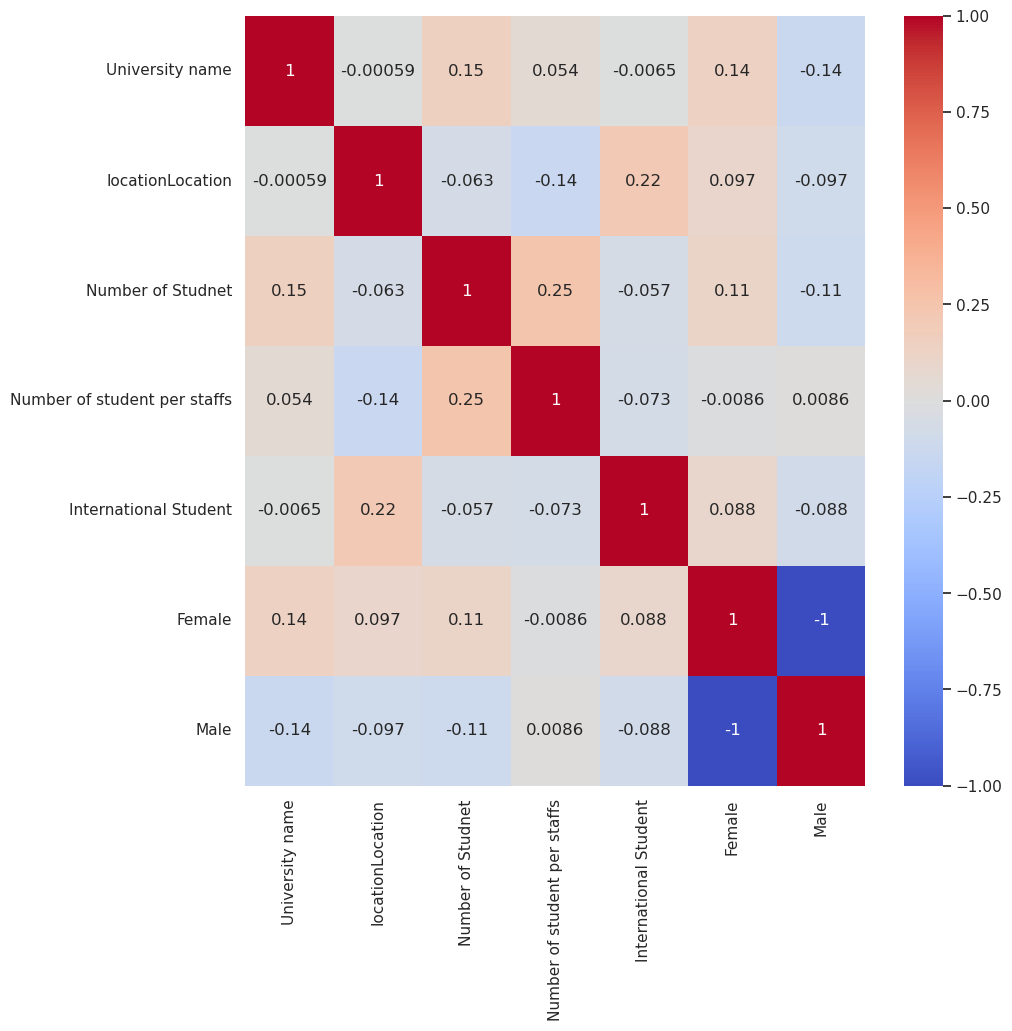

In [48]:
Corr_Matrix = df.corr()

# Set up the figure and plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(Corr_Matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

In [49]:
print('Top 5 Most Positively Correlated to the To salary_in_usd')
Corr_Matrix['International Student'].sort_values(ascending=False).head(5)

Top 5 Most Positively Correlated to the To salary_in_usd


International Student    1.000000
locationLocation         0.215033
Female                   0.087629
University name         -0.006481
Number of Studnet       -0.057457
Name: International Student, dtype: float64

In [50]:
print('Top 5 Most Negatively Correlated to salary_in_usd ')
Corr_Matrix['International Student'].sort_values(ascending=True).head(5)

Top 5 Most Negatively Correlated to salary_in_usd 


Male                           -0.087629
Number of student per staffs   -0.072798
Number of Studnet              -0.057457
University name                -0.006481
Female                          0.087629
Name: International Student, dtype: float64